In [1]:
# predict weight based on height
# open and read csv file
data = read.csv('Cung cap buoi 8/baseball.csv')
print(head(data))
print(is.data.frame(data))
print(paste('cols:', ncol(data)))
print(paste('rows:', nrow(data)))

             Name Team       Position Height Weight   Age PosCategory
1   Adam_Donachie  BAL        Catcher     74    180 22.99     Catcher
2       Paul_Bako  BAL        Catcher     74    215 34.69     Catcher
3 Ramon_Hernandez  BAL        Catcher     72    210 30.78     Catcher
4    Kevin_Millar  BAL  First_Baseman     72    210 35.43   Infielder
5     Chris_Gomez  BAL  First_Baseman     73    188 35.71   Infielder
6   Brian_Roberts  BAL Second_Baseman     69    176 29.39   Infielder
[1] TRUE
[1] "cols: 7"
[1] "rows: 1015"


In [2]:
summary(data)

     Name               Team             Position             Height     
 Length:1015        Length:1015        Length:1015        Min.   :67.00  
 Class :character   Class :character   Class :character   1st Qu.:72.00  
 Mode  :character   Mode  :character   Mode  :character   Median :74.00  
                                                          Mean   :73.69  
                                                          3rd Qu.:75.00  
                                                          Max.   :83.00  
     Weight           Age        PosCategory       
 Min.   :150.0   Min.   :20.90   Length:1015       
 1st Qu.:186.0   1st Qu.:25.41   Class :character  
 Median :200.0   Median :27.90   Mode  :character  
 Mean   :201.3   Mean   :28.71                     
 3rd Qu.:215.0   3rd Qu.:31.19                     
 Max.   :290.0   Max.   :48.52                     

In [3]:
str(data)

'data.frame':	1015 obs. of  7 variables:
 $ Name       : chr  "Adam_Donachie" "Paul_Bako" "Ramon_Hernandez" "Kevin_Millar" ...
 $ Team       : chr  "BAL" "BAL" "BAL" "BAL" ...
 $ Position   : chr  "Catcher" "Catcher" "Catcher" "First_Baseman" ...
 $ Height     : int  74 74 72 72 73 69 69 71 76 71 ...
 $ Weight     : int  180 215 210 210 188 176 209 200 231 180 ...
 $ Age        : num  23 34.7 30.8 35.4 35.7 ...
 $ PosCategory: chr  "Catcher" "Catcher" "Catcher" "Infielder" ...


In [4]:
baseball = data[c('Height', 'Weight')]
print(head(baseball))

  Height Weight
1     74    180
2     74    215
3     72    210
4     72    210
5     73    188
6     69    176


In [5]:
baseball['Height'] = baseball['Height'] * 0.0254
baseball['Weight'] = baseball['Weight'] * 0.453592
print('After preprocessing data:')
print(head(baseball))

[1] "After preprocessing data:"
  Height   Weight
1 1.8796 81.64656
2 1.8796 97.52228
3 1.8288 95.25432
4 1.8288 95.25432
5 1.8542 85.27530
6 1.7526 79.83219


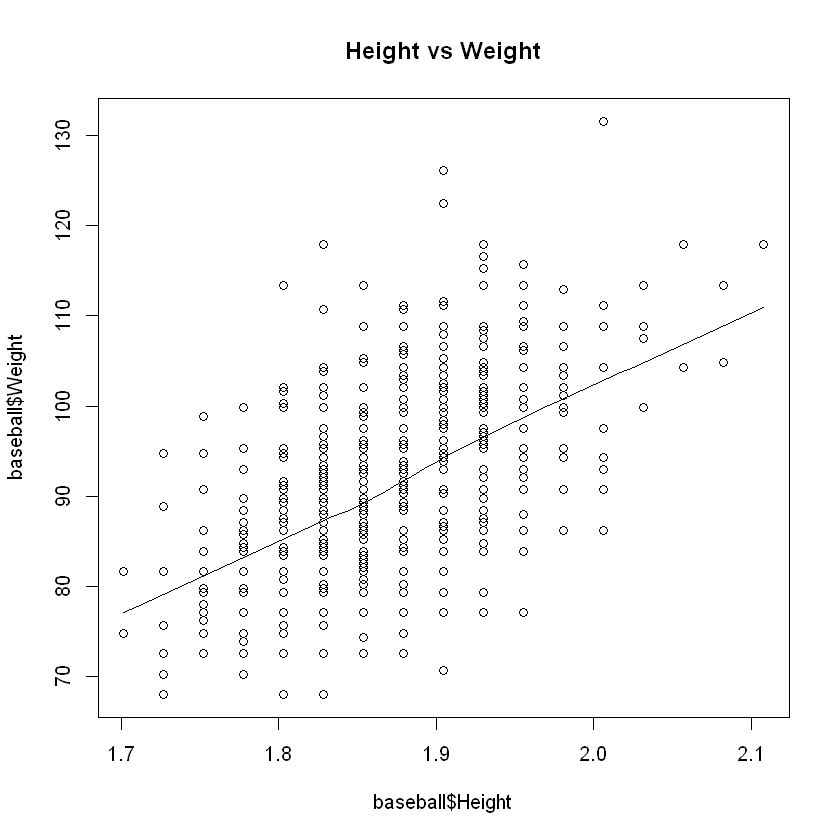

In [6]:
scatter.smooth(x=baseball$Height, y=baseball$Weight,
              main = 'Height vs Weight')

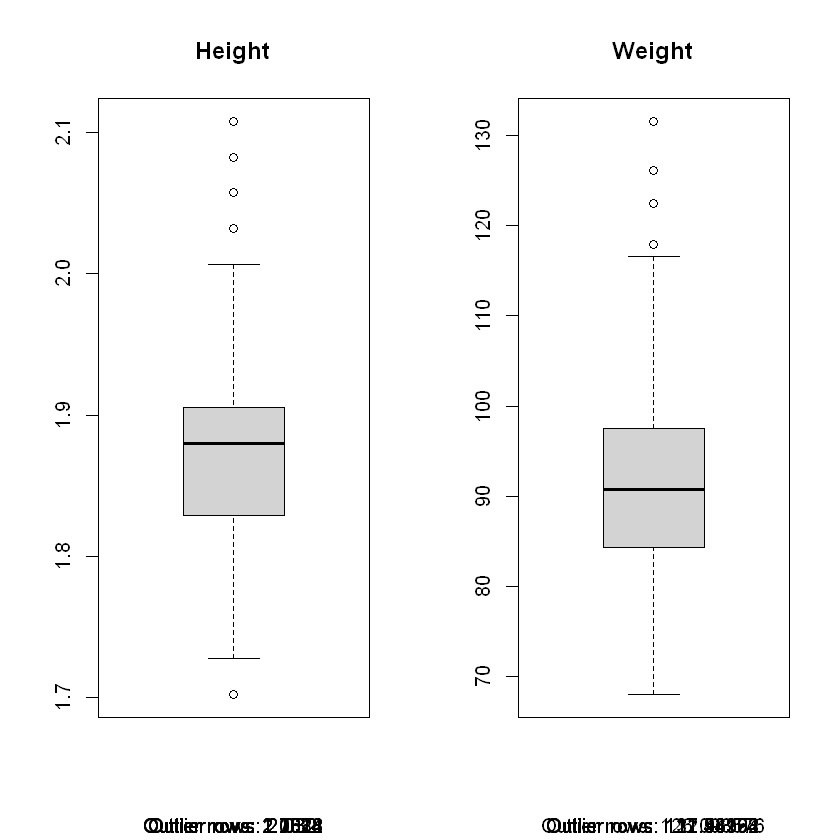

In [7]:
# Boxplot to check for outliers
par(mfrow=c(1,2)) # divide graph area in 2 columns
boxplot(baseball$Height, main='Height',
       sub=paste('Outlier rows:',
                boxplot.stats(baseball$Height)$out))
boxplot(baseball$Weight, main='Weight',
       sub=paste('Outlier rows:',
                boxplot.stats(baseball$Weight)$out))

In [8]:
# calculate correlation between Width and Length
print(cor(baseball$Height, baseball$Weight))

wt_outliers = c(boxplot.stats(baseball$Weight)$out)
print('wt_outliers:')
print(wt_outliers)

ht_outliers = c(boxplot.stats(baseball$Height)$out)
print('ht_outliers:')
print(ht_outliers)

[1] 0.5315393
[1] "wt_outliers:"
[1] 117.9339 122.4698 131.5417 126.0986 117.9339 117.9339 117.9339
[1] "ht_outliers:"
 [1] 2.0574 2.0320 2.0320 2.0320 2.0320 2.0828 2.0320 2.0574 2.0828 2.1082
[11] 1.7018 1.7018


In [9]:
# drop rows have outliers
print(paste('Before drop:', nrow(baseball)))
for(record in wt_outliers){
    baseball = baseball[baseball$Weight != record,]
}
for (record in ht_outliers){
    baseball = baseball[baseball$Height != record,]
}
print(paste('After drop:', nrow(baseball)))

[1] "Before drop: 1015"
[1] "After drop: 998"


In [10]:
# Create the training (development) and test (validation) data.
# https://rafalab.github.io/dsbook/probability.html#monte-carlo-simulations-for-categorical-data
set.seed(42) # setting seed to reproduce results of random sampling
trainingRowIndex = sample(1:nrow(baseball), 0.7*nrow(baseball))
print('Selected training row indexes:')
print(trainingRowIndex)

[1] "Selected training row indexes:"
  [1] 561 997 321 153  74 228 146 634  49 128 303  24 839 356 601 165 622 532
 [19] 410 882 879 899 297 984 283 932 621 517 212 930 860 872 259 314 481 298
 [37] 987 158 299 911 406 965 648 292 836 992 972 348 197 516 226 504 946 355
 [55] 727 245 922 626 262 390 130 372   3 374 405 770 870 698 650  40 971  33
 [73] 103 993 109 329 669  76 777 491 547 733  16 357 732 248 325 630 642  82
 [91] 881 912 982 360 296 149 569 100 963 402  91 781 181  54 851 288 720 758
[109]  60 285 849 620 377 853 638 427 442 112 584 889 513 141 718 311 474 811
[127] 554  42 760 865 251 441 942  25 703 544 888 238 526 623 940 947 960 446
[145] 892 369 512 891 885 754 799 224 774 214 294 607 518 764 783 546 426 471
[163] 188 254 268 640 980  41 193 578 824 664  98 537 951 107 317  14 162 636
[181] 706 843 863 697 796 959  37 138 850 773 918  78 968 668  97 741 483 182
[199] 874 127 493 555 692 506 337 539 542 180 970 587 201 401  62 269 382 124
[217]  63 998 573 628 769 5

In [11]:
trainingData = baseball[trainingRowIndex,] # training data
testData = baseball[-trainingRowIndex,] # test data

In [12]:
print('Rows of training data and test data:')
print(nrow(trainingData))
print(nrow(testData))

[1] "Rows of training data and test data:"
[1] 698
[1] 300


In [13]:
# Develop the model on the training data and uise it to predict the Length on test data
lmMod = lm(Weight ~ Height, data = trainingData) # Build the model
iPred = predict(lmMod, testData) # predict length
# mean square error according to model
mse = mean(lmMod$residuals^2)
print(paste('mse:', mse))

[1] "mse: 62.1665992405895"


In [14]:
# mean square error of testData
mse_test = mean((testData$Weight - iPred)^2)
print(paste('mse in test:', mse_test))

[1] "mse in test: 57.1830374137476"


In [15]:
summary(lmMod)$r.squared
# => r^2 has low value, this model fits ~ 27% data => not good!

[1] 0.2241192

In [16]:
# Review diagnostic measures.
print(summary(lmMod)) # model summary


Call:
lm(formula = Weight ~ Height, data = trainingData)

Residuals:
     Min       1Q   Median       3Q      Max 
-22.8230  -5.6531  -0.1704   5.1062  27.6049 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -52.482     10.113   -5.19 2.76e-07 ***
Height        76.675      5.408   14.18  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.896 on 696 degrees of freedom
Multiple R-squared:  0.2241,	Adjusted R-squared:  0.223 
F-statistic:   201 on 1 and 696 DF,  p-value: < 2.2e-16



In [17]:
# model coefficients
print(coef(lmMod))
# get beta estimate for height
beta_height = coef(lmMod)['Height']
print(paste('sloop:', beta_height))
Intercept = coef(lmMod)['(Intercept)']
print(paste('Intercept:', Intercept))

(Intercept)      Height 
  -52.48233    76.67488 
[1] "sloop: 76.6748792521467"
[1] "Intercept: -52.4823323447618"


In [18]:
# new predictions
# solution 1 
x = c(1.775, 1.825, 1.925)
y = Intercept + beta_height * x
print('Solution 1 - results:')
print(y)

[1] "Solution 1 - results:"
[1] 83.61558 87.44932 95.11681


In [19]:
# solution 2
y1 = predict(lmMod, data.frame(Height=x))
print('Solution 2 - results:')
print(y1)

[1] "Solution 2 - results:"
       1        2        3 
83.61558 87.44932 95.11681 


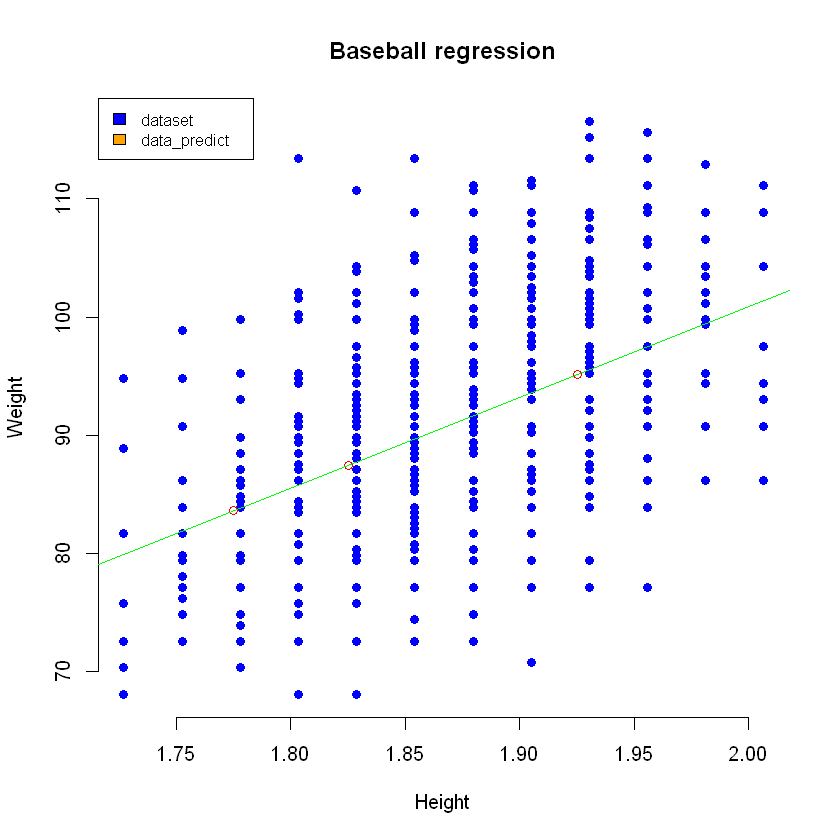

In [20]:
# visualization 
plot(baseball$Height, baseball$Weight, 
     main = 'Baseball regression',
     xlab='Height', ylab='Weight',
     pch = 19, frame = FALSE, col = 'blue')
lines(x, y, col='red', type = 'p')
abline(lmMod, baseball, col = 'green')
legend('topleft', c('dataset', 'data_predict'),
      cex = 0.8, fill= c('blue','orange'))